<a href="https://colab.research.google.com/github/rahulnegi20/The-Spark-Foundation-Task-Data-Science-/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* ### Author | Rahul Negi 

# Task - | Prediction using Decision Tree Algorithm

* ### Data : https://bit.ly/3kXTdox
## **The purpose is if we feed any new data to the classifier, it would be able to predict the right class accordingly.**


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
#loadind dataset
iris = pd.read_csv('drive/MyDrive/ML-DATA/Iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#checking if data has missing values or not
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Our data is in perfect shape

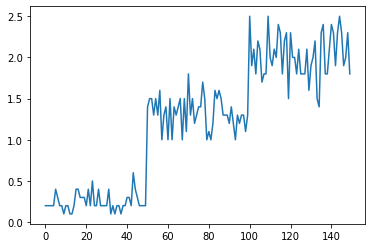

In [ ]:
iris.PetalWidthCm.plot();

In [ ]:
#spliting the data
X = iris.iloc[:, :5]
y = iris.Species

print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
### Training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Decision Tree Model 1 (Priliminary Approach)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score
### Checking the model score
print('Score of our Model 1 :', dtree.score(X_test, y_test))
#checking the cross-validation accuracy score
cv_score = cross_val_score(dtree, X_train, y_train, cv=20, scoring="accuracy", n_jobs=-1)
print('Accuracy of CV in Model 1 :', cv_score.mean()*100)

Score of our Model 1 : 1.0
Accuracy of CV in Model 1 : 93.33333333333333


We can see our model is scoring 1, which means our model is overfitting, so lets tune our model to improve our model accuracy

### Decision Tree Model 2(Minimizing Impurity Approach)

In [ ]:
dtree_2 = DecisionTreeClassifier(criterion='gini', random_state=0)
dtree_2.fit(X_train, y_train)

#scoring
dtree_2.score(X_test, y_test)
print('Score of Model 2 :', dtree_2.score(X_test, y_test))
#cv scoring
cv_score_2 = cross_val_score(dtree_2, X_train, y_train, cv=20, scoring="accuracy", n_jobs=-1)
print('Accuracy of CV in Model 2 : ', cv_score_2.mean()*100)

Score of Model 2 : 1.0
Accuracy of CV in Model 2 :  92.5


Our model is still overfitting!!!!!!!

### Decision Tree Model 3(Optimizing Hyperparameters by GridSearch Approach)

In [ ]:
from sklearn.model_selection import GridSearchCV
dtree_3 = DecisionTreeClassifier(random_state=0)

params_dt={
    "max_depth":[1,2,3,4,5,6,7,8],
    "min_samples_leaf":list(map(lambda x:x/1000,range(1,100,1))),
    "max_features":[1,2,3,4]
}

grid_dt=GridSearchCV(estimator=dtree_3, param_grid=params_dt, scoring="accuracy", cv=20, n_jobs=-1)

In [ ]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='depr...
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': [1, 2, 3, 4],
                         

In [ ]:
grid_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
final_model =grid_dt.best_estimator_
final_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Model scoring
print('Model 3 Score :',final_model.score(X_test, y_test))

#CV scoring
print('CV accuracy score : ', grid_dt.best_score_*100)

Model 3 Score : 0.9666666666666667
CV accuracy score :  95.0


Finally our model is not overfitting or underfitting now we can proceed to Visualise the decision tree.


### Visualising the Final Model

In [ ]:
import sklearn.datasets as datasets
# Load the iris dataset
iris_df = datasets.load_iris()

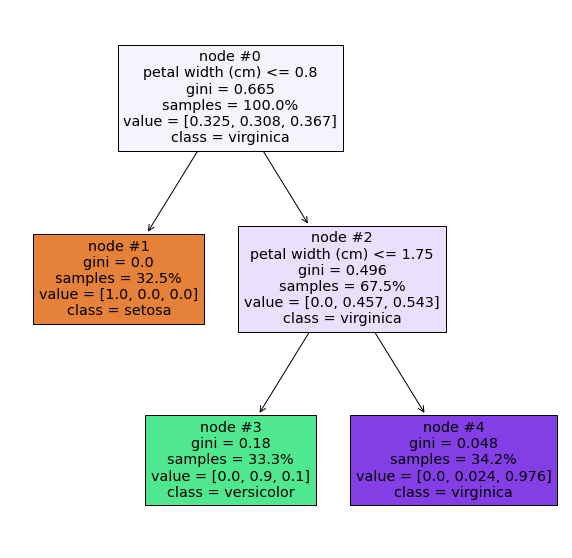

In [ ]:
fig = plt.figure(figsize=(10,10))
#ploting the tree
tree.plot_tree(final_model, feature_names=iris_df.feature_names,
               class_names = iris_df.target_names,
               filled=True,
               impurity=True,
               node_ids=True,
               proportion=True,
              
               );